# 04. Backpropagation Algorithm - Artificial Neural Network <br>
___

## Import necessary libraries 

In [136]:
# Imports the random module, which contains a variety of things to do with random number generation. 
import random 

# Python has math library and has many functions regarding it. One such function is exp(). 
# This method is used to calculate the power of e i.e. e^y or we can say exponential of y. 
# The value of e is approximately equal to 2.71828…..from math import exp.
from math import exp 

# Seed function is used to save the state of random function, so that it can generate some random numbers on multiple execution 
# of the code on the same machine or on different machines (for a specific seed value). 
# Seed value is the previous value number generated by the generator. For the first time when there is no previous value, 
# it uses current system time.
from random import seed 

## Artificial Neural Network <br>

### Weight Matrix Visualization <br>
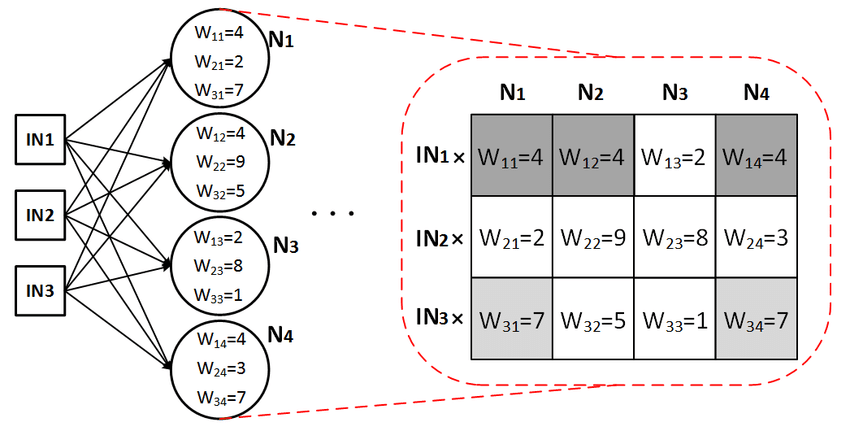 <br>
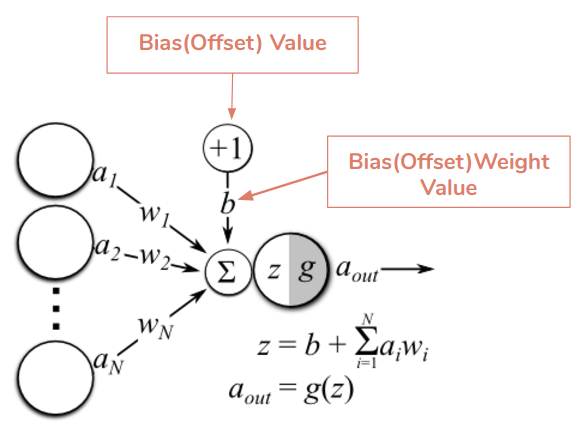<br>

__[Everything you need to know about Neural Networks and Backpropagation](https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a)__<br>
__[Neural networks and back-propagation explained in a simple way](https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e)__<br>

In [137]:
# The initialize_network() function is used to create your neural net and initilize your network 
# with random small weights.

# initialize_network() takes in three parameters:
#     => No.of input layer neurons. 
#     => No.of hidden layer neurons.
#     =>No.of output layer neurons.

def initialize_network(n_input, n_hidden, n_output):
    # We will be storing the neural nets weights in n-dimentional Weight Matrix.
    network = []
    
    # Initileze the hiddent layer with random weights, the n_inputs + 1 you see in the for loop is for the bias as shown in the 
    # the figure above.
    # random.uniform() generates a random number x where -0.5<= x <=0.5.
    # hidden_layer will be assigned with a list which contains the weights of each neuron stored as a dictionary in this list.
    hidden_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_input + 1)]} for i in range(n_hidden)] 
    
    # Append hidden_layer weights to main list
    network.append(hidden_layer) 
    
    # Similarly do it for the output layer
    output_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_hidden + 1)]} for i in range(n_output)] 
    network.append(output_layer) 
    
    # Return the multi-dimentional weight matrix of the neural net
    return network

In [138]:
# Train a network for a fixed number of epochs 
# Epoch - is one complete presentation of the data set to be learned to a learning machine. 
# Learning machines like feedforward neural nets that use iterative algorithms often need many epochs during their learning phase.

# learning rate - In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines 
# the step size at each iteration while moving toward a minimum of a loss function.
def train_network(network, train_data, l_rate, n_epoch, n_outputs):

    for epoch in range(n_epoch): 
        # Initilize errors to zero.
        sum_error = 0 
        for row in train_data: 
            # forward propagate with each set of training data (X, y)
            outputs = forward_propagate(network, row) 
            
            # Prepare a list that represents the class of the training sample.
            # Here the index of the expected list represents the classes in your dataset.
            # According to the class of your training sample your set the list to be [1, 0] if class 0 and [0, 1] if class 1.
            expected = [0 for i in range(n_outputs)] 
            expected[row[-1]] = 1
            
            # For each output neuron compute the error
            # error = sum(d-z)^2 where d = expected output z = output by neural net
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))]) 
            
            # Backward propagate the error at the output to the previous layers
            backward_propagate_error(network, expected) 
            
            # Accordingly, update the weights of the network according to errors computed.
            update_weights(network, row, l_rate) 
        # Print the error after each epoch
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))


In [139]:
# Forward propagate input to a network output 
def forward_propagate(network, row):
    # Initial input to the network
    inputs = row 
    for layer in network: 
        new_inputs = [] 
        for neuron in layer: 
            # Compute the data passing into the neuron "neuron"
            activation = activate(neuron['weights'], inputs) 
            # Apply the sigmoid activation function and save the output of the neuron with a new key 'output' in the neuron dictionary
            neuron['output'] = transfer(activation) 
            # Save the output of the neuron so it can be used as input to the next layers neuron
            new_inputs.append(neuron['output']) 
        inputs = new_inputs 
    # Return the output of the output-layer
    return inputs


## Backward Propagation Algorithm<br>

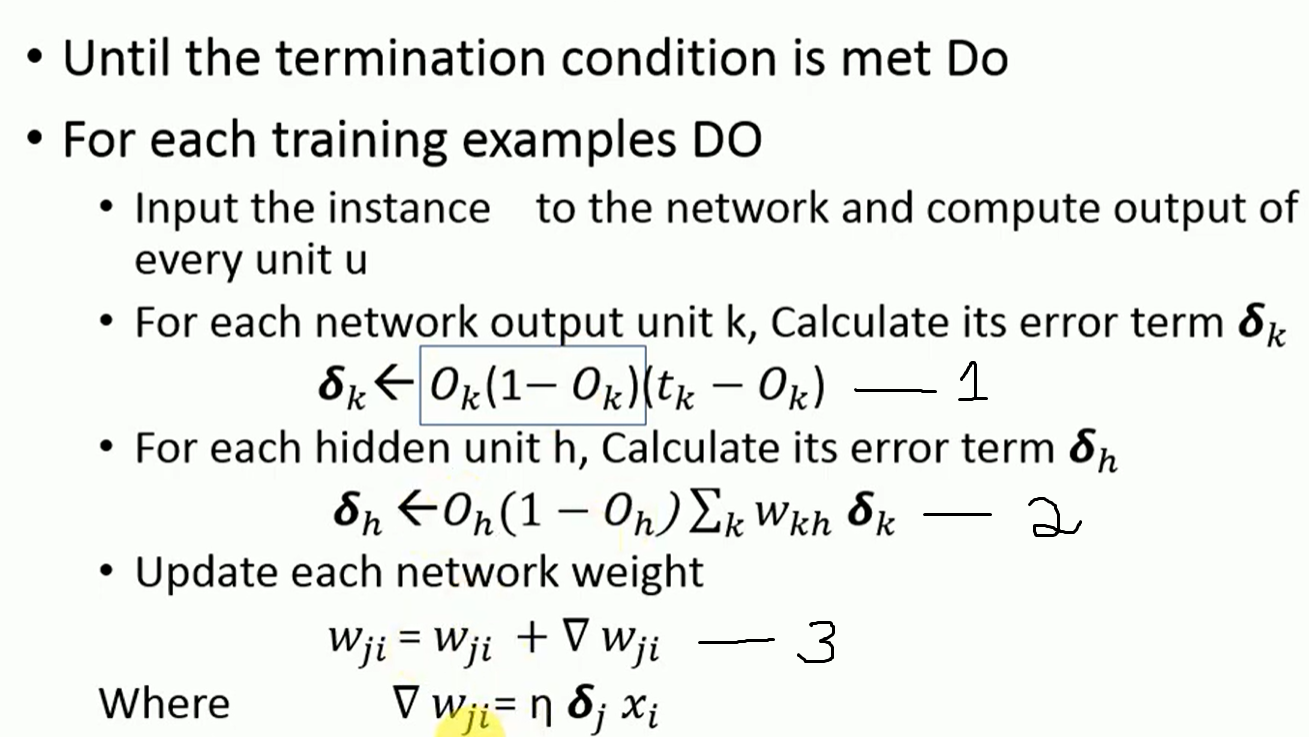

In [140]:
# Backpropagate error and store in neurons 
def backward_propagate_error(network, expected): 
    
    # In backward propagation we start with the output layer and proceed to the previous layers respectively,
    # hence we use the reverse funtion
    for i in reversed(range(len(network))): 
        # For each layer in network
        layer = network[i] 
        errors = list() 
        
        # Check if current layer is the hidden layer
        if i != len(network)-1: 
            
            # This if block is used to computer the error of the neurons in the hidden layer as shown by formula (2) in the above
            # diagram
            for j in range(len(layer)): 
                error = 0.0 
                for neuron in network[i + 1]: 
                    error += (neuron['weights'][j] * neuron['delta']) 
                errors.append(error) 
        else: 
            # This else block is responsible for computing the error of the output layer as shown by formula (1) in the above 
            # diagram
            for j in range(len(layer)): 
                neuron = layer[j] 
                errors.append(expected[j] - neuron['output']) 
        
        # Compute the delta value using the transfer_derivative function and the errors computed
        # Save the delta value with key 'delta' in the neurons dictionary.
        for j in range(len(layer)): 
            neuron = layer[j] 
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [141]:
#Update network weights with error 
def update_weights(network, row, l_rate): 
    
    for i in range(len(network)):
        # Initial input to the network
        inputs = row[:-1]
        
        # If the current layer is not the input layer then the input to the neural net is the output of the previous layers.
        if i != 0: 
            inputs = [neuron['output'] for neuron in network[i - 1]] 
        for neuron in network[i]: 
            for j in range(len(inputs)): 
                # Update weight according to formula (3) in the above diagram
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j] 
            # Add the weight of the bias.
            neuron['weights'][-1] += l_rate * neuron['delta']


In [142]:
# Calculate neuron activation for an input 
def activate(weights, inputs): 
    activation = weights[-1] 
    for i in range(len(weights)-1): 
        activation += weights[i] * inputs[i] 
    return activation

# Transfer neuron activation 
def transfer(activation): 
    return 1.0 / (1.0 + exp(-activation))


# Calculate the derivative of an neuron output 
def transfer_derivative(output): 
    return output * (1.0 - output)

In [143]:
# seed method is used to initialize the pseudorandom number generator in Python.
seed(1)

# Copy and past datasets from the lab4.txt file from the datset folder
dataset = [[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0], 
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0], 
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1], 
           [5.332441248,2.088626775,1], 
           [6.922596716,1.77106367,1], 
           [8.675418651,-0.242068655,1], 
           [7.673756466,3.508563011,1]]

# Size of input data that you are going to feed into the network.
input_layer = len(dataset[0]) - 1
# Size of the output layer of the neural net / the total no.of classes in your dataset.
output_layer = len(set([row[-1] for row in dataset]))

print("Input Layers: ", input_layer)
print("Output Layers: ", output_layer)

Input Layers:  2
Output Layers:  2


In [144]:
# Initialize network weights
network = initialize_network(input_layer, 2, output_layer)
network

[[{'weights': [-0.3656357558875988, 0.3474337369372327, 0.26377461897661403]},
  {'weights': [-0.2449309742605783,
    -0.004564912908059049,
    -0.050508935211261874]}],
 [{'weights': [0.15159297272276295, 0.2887233511355132, -0.4061404132257651]},
  {'weights': [-0.4716525234779937,
    0.3357651039198697,
    -0.06723293209494663]}]]

In [145]:
# Train network
train_network(network, dataset, 0.5, 20, output_layer)

>epoch=0, lrate=0.500, error=4.763
>epoch=1, lrate=0.500, error=4.558
>epoch=2, lrate=0.500, error=4.316
>epoch=3, lrate=0.500, error=4.035
>epoch=4, lrate=0.500, error=3.733
>epoch=5, lrate=0.500, error=3.428
>epoch=6, lrate=0.500, error=3.132
>epoch=7, lrate=0.500, error=2.850
>epoch=8, lrate=0.500, error=2.588
>epoch=9, lrate=0.500, error=2.348
>epoch=10, lrate=0.500, error=2.128
>epoch=11, lrate=0.500, error=1.931
>epoch=12, lrate=0.500, error=1.753
>epoch=13, lrate=0.500, error=1.595
>epoch=14, lrate=0.500, error=1.454
>epoch=15, lrate=0.500, error=1.329
>epoch=16, lrate=0.500, error=1.218
>epoch=17, lrate=0.500, error=1.120
>epoch=18, lrate=0.500, error=1.033
>epoch=19, lrate=0.500, error=0.956


In [146]:
i = 1
for layer in network:
    j = 1
    for neuron in layer:
        print(f"Layer[{i}] Neuron[{j}]\n")
        print(neuron)
        print()
        j += 1
    i += 1

Layer[1] Neuron[1]

{'weights': [-1.435239043819221, 1.8587338175173547, 0.7917644224148094], 'output': 0.029795197360175857, 'delta': -0.006018730117768359}

Layer[1] Neuron[2]

{'weights': [-0.770495989974279, 0.8257894037467045, 0.21154103288579734], 'output': 0.06771641538441571, 'delta': -0.005025585510232044}

Layer[2] Neuron[1]

{'weights': [2.2235849333628925, 1.2428928053374766, -1.3519548925527454], 'output': 0.23499833662766154, 'delta': -0.042246618795029306}

Layer[2] Neuron[2]

{'weights': [-2.509732251870173, -0.5925943219491905, 1.259965727484093], 'output': 0.7543931062537561, 'delta': 0.04550706392557862}



In [147]:
# Make a prediction with a network 
def predict(network, row): 
    outputs = forward_propagate(network, row) 
    print(outputs)
    return outputs.index(max(outputs))

In [148]:
# Print predictions
for row in dataset: 
    prediction = predict(network, row) 
    print(f'Expected = {row[-1]}, Got = {prediction}')

[0.7604377047966288, 0.24430368299553618]
Expected = 0, Got = 0
[0.8442851223410828, 0.17130296511915652]
Expected = 0, Got = 0
[0.8577367737653824, 0.158816492291445]
Expected = 0, Got = 0
[0.8145087862751961, 0.19781872200698228]
Expected = 0, Got = 0
[0.7901291784755652, 0.2157804118755934]
Expected = 0, Got = 0
[0.2147021559892623, 0.7728066611766448]
Expected = 1, Got = 1
[0.24651178902103996, 0.7461108582116849]
Expected = 1, Got = 1
[0.2117524916577187, 0.7751986912094803]
Expected = 1, Got = 1
[0.2058094873357953, 0.7788889225981827]
Expected = 1, Got = 1
[0.22664898242969214, 0.7623465228603523]
Expected = 1, Got = 1
